# Shubham Agrawal

# Objective
* To predict the percantage of marks, a student can obtain based on the number of study hours.
* To predict the score if a student studies for 9.25hours/day


##  Introduction
The data provided contains only 2 variables. We will make a simple regression model, then predict the score for the stated objective using this model.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

In [2]:
# loading and reading the data
url = "http://bit.ly/w-data"
df= pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

**We have only 25 rows**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**No NULL values**

## Visualization

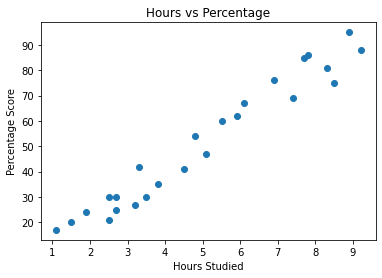

In [5]:
plt.scatter(x=df['Hours'], y=df['Scores'])  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

***There is a positive linear relationship between the two variables***

In [6]:
# Dividing our data into a feature and target varaible
X=df.drop(columns=['Scores'])
y=df['Scores']

We will use **Scikit-Learn's train_test_split() method**, to split our data into training and test sets for validating our model.

In [7]:
# importing train_test_split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

##  Model Building

In [8]:
# importing the linear regression model
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 


LinearRegression()

In [9]:
print('value of the slope:', lr.coef_)
print('value of intercept:', lr.intercept_)

value of the slope: [9.68207815]
value of intercept: 2.826892353899737


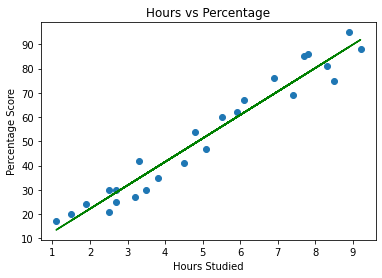

In [10]:
# plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='green')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [11]:
# predictig the values
y_pred=lr.predict(X_test)
y_pred

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


## Model Evaluation


In [13]:
from sklearn import metrics 
import math
error=round(math.sqrt( metrics.mean_squared_error(y_test, y_pred)),2)
print('root mean square error :', error) 

root mean square error : 4.35


**Determining the score if a student studies for 9.25hours/day**


In [14]:
# Determining the score of a student who studies for 9.25 hours

pred=lr.predict([[9.25]])
score = round(pred[0],2)
print('Predicted Score =', score)

Predicted Score = 92.39


In [15]:
print('The predicted score is between', score-error, 'to', score+error)

The predicted score is between 88.04 to 96.74
